In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
cancer = pd.read_csv("Datamodified.csv")

What Variables to choose? I want to choose variables that are more correlated with a cell being positive for cancer.

In [8]:
#add dummy variables 
#cancer.diagnosis.map({'B':0,'M':1}) #new dummy column for diagnosis
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


From here. Im going to export this csv into R and use the Lares package to see what variables have the highest correlation for cancer positivity

In [7]:
cancer.to_csv('cancerwpositive.csv', index = False)

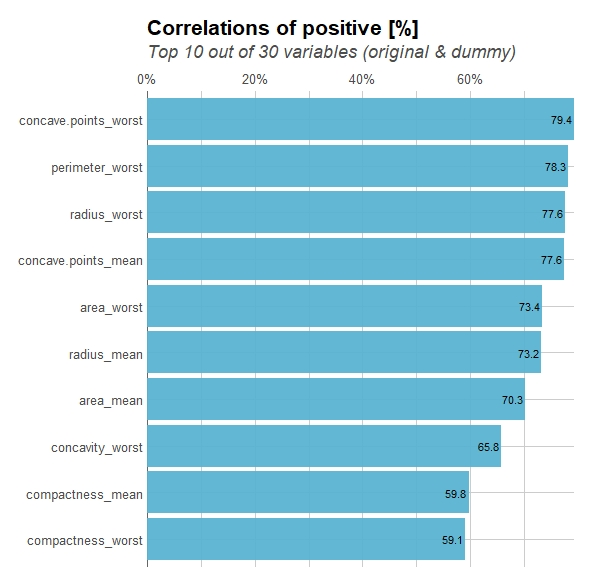

In [8]:
from IPython.display import Image
Image(r"C:\Users\sahil\Downloads\corroplotc2.jpeg") 

I will be choosing to explore these 10 features as apart of my project. I'm hoping they will make my machine learning models accurate

In [9]:
#cancer = cancer.drop(cancer.columns[[0,3,4,6,8,10,11,12,13,14,15,16,17,18,19,20,21,23,26,30,31]], axis = 1)
cancer.head()

,diagnosis,radius_mean,area_mean,compactness_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,positive
0,M,17.99,1001.0,0.27760,0.14710,25.38,184.60,2019.0,0.6656,0.7119,0.2654,1
1,M,20.57,1326.0,0.07864,0.07017,24.99,158.80,1956.0,0.1866,0.2416,0.1860,1
2,M,19.69,1203.0,0.15990,0.12790,23.57,152.50,1709.0,0.4245,0.4504,0.2430,1
3,M,11.42,386.1,0.28390,0.10520,14.91,98.87,567.7,0.8663,0.6869,0.2575,1
4,M,20.29,1297.0,0.13280,0.10430,22.54,152.20,1575.0,0.2050,0.4000,0.1625,1


In [9]:
print(cancer.describe(include = ['object'])) #observing diagnosis
print(569-357)

diagnosis
count        569
unique         2
top            B
freq         357
212


In [39]:
cancer.describe() #stats

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,568.000000,569.000000,569.000000,568.000000,566.000000,568.000000,567.000000,567.000000,567.000000,...,567.000000,568.000000,569.000000,569.000000,569.000000,569.000000,568.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.130245,19.289649,105.047821,654.229225,0.096248,0.104354,61.817244,0.048854,0.710289,...,16.276118,25.687271,107.261213,880.583128,0.132369,0.254265,0.271431,0.114606,0.290076,0.083946
std,1.250206e+08,3.526450,4.301036,312.218444,353.150358,0.013971,0.052858,1469.858104,0.038787,12.596692,...,4.840100,6.146996,33.602542,569.356993,0.022832,0.157336,0.208023,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,0.800000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.697500,16.170000,75.210000,419.900000,0.086130,0.064815,0.029570,0.020310,0.162000,...,13.010000,21.095000,84.110000,515.300000,0.116600,0.147200,0.114475,0.064930,0.250400,0.071460
50%,9.060240e+05,13.375000,18.840000,86.340000,548.750000,0.095825,0.092525,0.061550,0.033500,0.179300,...,14.970000,25.425000,97.660000,686.500000,0.131300,0.211900,0.226550,0.099930,0.282200,0.080040
75%,8.813129e+06,15.797500,21.800000,104.300000,784.150000,0.105250,0.130425,0.132000,0.073820,0.195800,...,18.800000,29.757500,125.400000,1084.000000,0.146000,0.339100,0.381400,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,7517.000000,2501.000000,0.163400,0.345400,35000.000000,0.201200,300.130000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [106]:
df = cancer.describe().loc[['mean', 'std']].T
df['var'] = df['std']**2
df.drop('std', axis=1)

,mean,var
radius_mean,14.233522,1.186905e+01
texture_mean,19.225154,1.793585e+01
perimeter_mean,106.172287,1.005989e+05
area_mean,660.835935,1.184108e+05
smoothness_mean,0.096368,1.899921e-04
compactness_mean,0.105104,2.744878e-03
concavity_mean,63.841969,2.231318e+06
concave points_mean,0.049710,1.466374e-03
symmetry_mean,0.727493,1.638793e+02
fractal_dimension_mean,9.973459,5.402312e+04


In [12]:
cancer_stats = {'median': [13.375,548.75,0.092525,0.033500,14.97,97.66,686.5,0.211,0.22655,0.099930], 
        'var': [12.435853,124715.175511,0.002794,0.001504,23.426565,1129.130847,324167.385102,0.024755,0.043274,0.004321]}

In [13]:
df = pd.DataFrame(cancer_stats, columns = ['median', 'var'], index = ['radius_mean','area_mean','compactness_mean','concave points_mean','radius_worst','perimeter_worst','area_worst','compactness_worst','concavity_worst','concave points_worst'])
df
#additional stats

,median,var
radius_mean,13.375000,12.435853
area_mean,548.750000,124715.175511
compactness_mean,0.092525,0.002794
concave points_mean,0.033500,0.001504
radius_worst,14.970000,23.426565
perimeter_worst,97.660000,1129.130847
area_worst,686.500000,324167.385102
compactness_worst,0.211000,0.024755
concavity_worst,0.226550,0.043274
concave points_worst,0.099930,0.004321


In [14]:
filt_df = cancer.loc[:, cancer.columns != 'positive',]
low = .0001
high = .9999
quant_df = filt_df.quantile([low, high])
print(quant_df)
#outliers

        radius_mean   area_mean  compactness_mean  concave points_mean  \
0.0001     7.021257     8.89109          0.019610              0.00000   
0.9999    28.070877  2500.88660          0.343472              0.20064   

        radius_worst  perimeter_worst  area_worst  compactness_worst  \
0.0001      7.972337        50.641744   187.38112           0.027689   
0.9999     35.875294       249.956080  4207.31040           1.051178   

        concavity_worst  concave points_worst  
0.0001         0.000000               0.00000  
0.9999         1.247351               0.29096  


In [15]:
cancer.dtypes #all variables are numerical except for diagnosis which is categorical

diagnosis                object
radius_mean             float64
area_mean               float64
compactness_mean        float64
concave points_mean     float64
radius_worst            float64
perimeter_worst         float64
area_worst              float64
compactness_worst       float64
concavity_worst         float64
concave points_worst    float64
positive                  int64
dtype: object

In [40]:
cancer.isna().mean().round(3) # percentage of missing values in each column
#another method
cancer_missing = cancer.isna()
cancer_missing.sum() #number of missing values in each column

id                         0
diagnosis                  0
radius_mean                1
texture_mean               0
perimeter_mean             0
area_mean                  1
smoothness_mean            3
compactness_mean           1
concavity_mean             2
concave points_mean        2
symmetry_mean              2
fractal_dimension_mean     1
radius_se                  0
texture_se                 0
perimeter_se               2
area_se                    2
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          2
symmetry_se                1
fractal_dimension_se       1
radius_worst               2
texture_worst              1
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            1
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

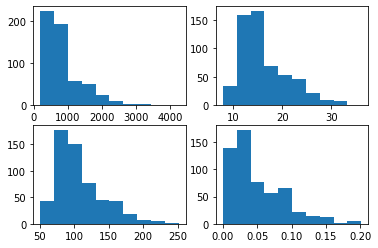

In [41]:
#we are going to examine distribtuion among the top 5 correlated variables with being positive for cancer
plt.subplot(2, 2, 1)  
plt.hist(cancer['area_worst']) #top left
plt.subplot(2, 2, 2)  
plt.hist(cancer['radius_worst']) #top right
plt.subplot(2, 2, 3)
plt.hist(cancer['perimeter_worst']) #bottom left
plt.subplot(2, 2, 4)
plt.hist(cancer['concave points_mean']) #bottom right
plt.show()

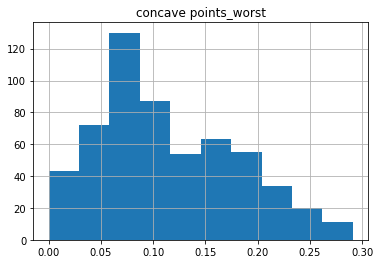

In [18]:
cancer.hist('concave points_worst') #1 correlation with diagnosis.
plt.show()

In [61]:
#engineer new feature. Im going to add up some columns that are highly correlated with positivity from the imported R graph. area_worst, radius_worst, and perimeter_worst to a new column called size_worst
filt = (cancer['area_mean'] < 2500) & (cancer['compactness_worst'] < 1.058) & (cancer['concavity_worst'] < 1.252) & (cancer['concavity_worst'] > 0) & (cancer['area_worst'] < 4254) & (cancer['concave points_worst'] > 0) 
#removing outliers without trying to lose too much data. Did 99.99 percent outlier identification in this case
cancer = cancer[filt]

# Engineer new feature
cancer['size_worst'] = cancer.area_worst + cancer.radius_worst + cancer.perimeter_worst
cancer.drop(['area_worst', 'radius_worst', 'perimeter_worst'], axis=1, inplace=True)
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,size_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2228.98
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2139.79
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1885.07
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,681.48
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1749.74


In [62]:
cancer['positive'] = cancer.diagnosis.map({'B':0,'M':1})  #add this column back
cancer.drop(['diagnosis','id'], axis=1, inplace=True)
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,size_worst,positive
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2228.98,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2139.79,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1885.07,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,681.48,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1749.74,1


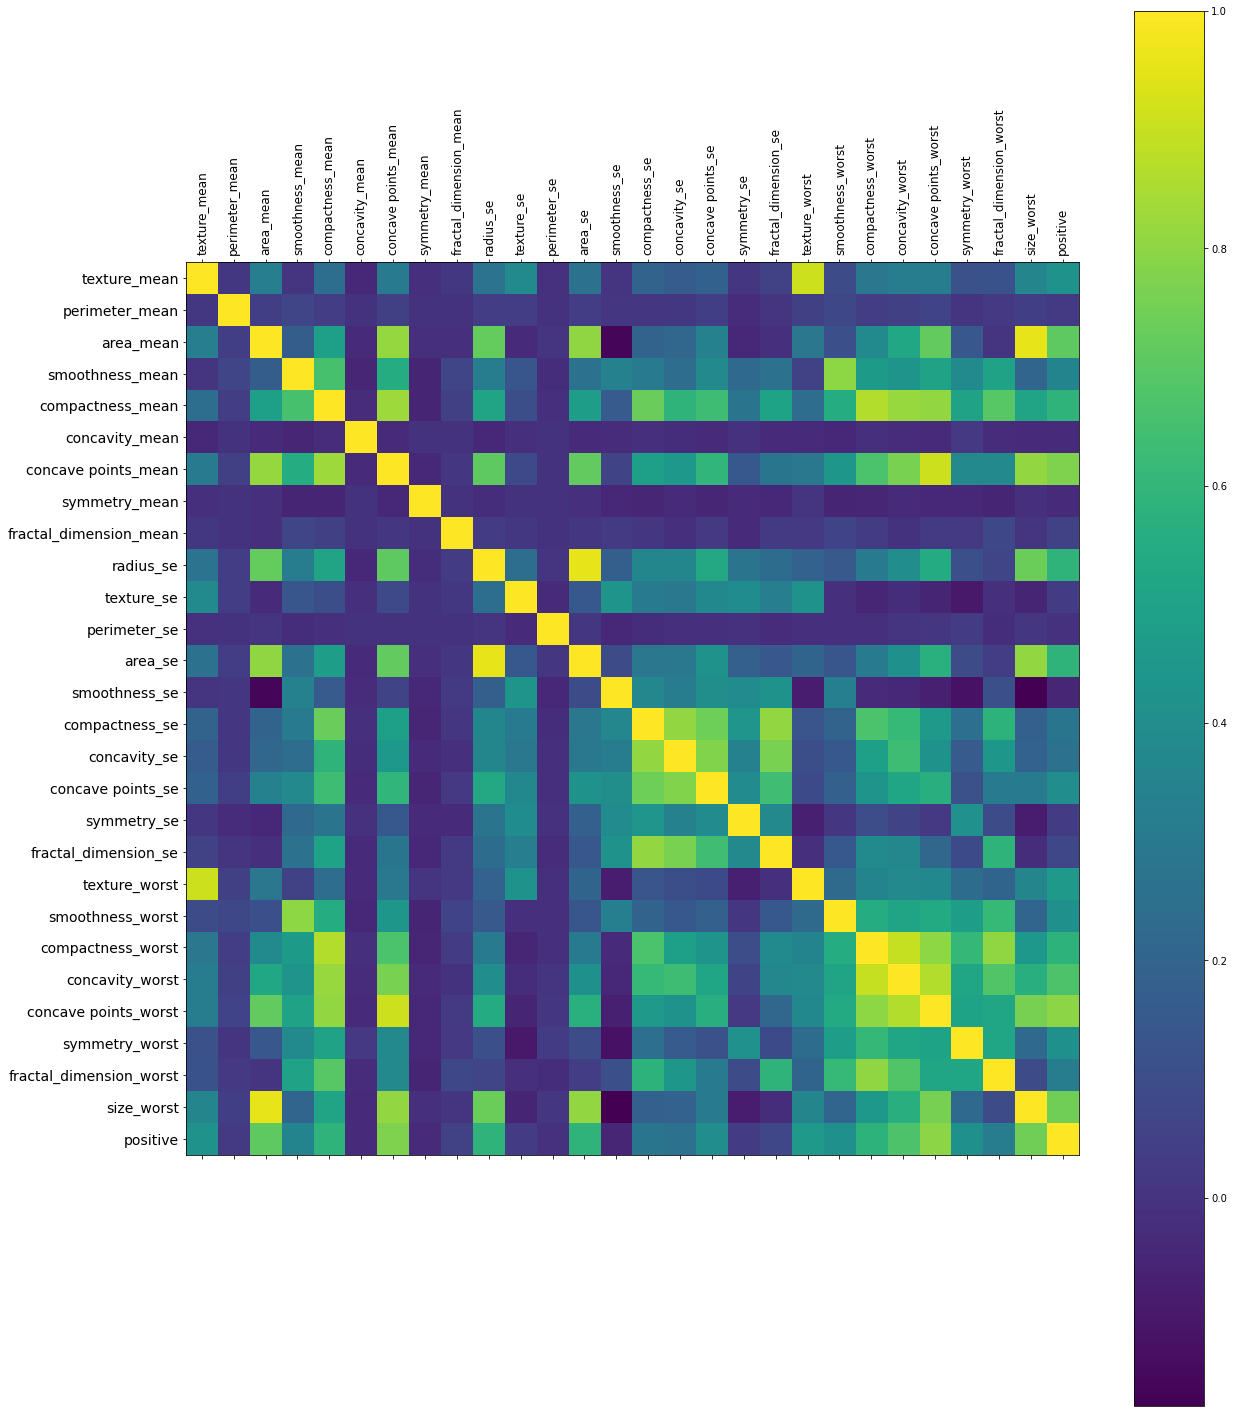

In [63]:
cancermat = cancer.drop(cancer.columns[[0]], axis = 1)
f = plt.figure(figsize=(20, 25))
plt.matshow(cancermat.corr(), fignum=f.number)
plt.xticks(range(cancermat.shape[1]), cancermat.columns, fontsize=12, rotation=90)
plt.yticks(range(cancermat.shape[1]), cancermat.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

# Machine Learning

In [46]:
cancer.info() #recap of what we have so far

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 567
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       551 non-null    int64  
 1   diagnosis                551 non-null    object 
 2   radius_mean              550 non-null    float64
 3   texture_mean             551 non-null    float64
 4   perimeter_mean           551 non-null    float64
 5   area_mean                551 non-null    float64
 6   smoothness_mean          548 non-null    float64
 7   compactness_mean         550 non-null    float64
 8   concavity_mean           549 non-null    float64
 9   concave points_mean      549 non-null    float64
 10  symmetry_mean            549 non-null    float64
 11  fractal_dimension_mean   550 non-null    float64
 12  radius_se                551 non-null    float64
 13  texture_se               551 non-null    float64
 14  perimeter_se             5

In [20]:
#Knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [65]:
cancernona = cancer.dropna() #drop all rows with NA's
y = cancernona['positive'].values
X = cancernona.drop('positive', axis = 1).values
neighbors = [1,2,3,4,5,6,7,8]
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=28, stratify=y)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    print(str(neighbor) + " " + str(round(knn.score(X_test, y_test),2)))
    
#3 neighbors is the most accurate model

1 0.92
2 0.93
3 0.92
4 0.92
5 0.92
6 0.92
7 0.92
8 0.92


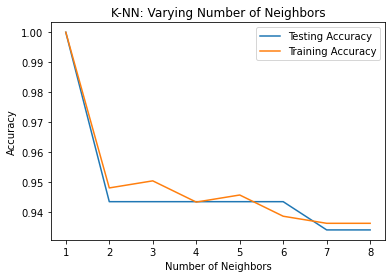

In [66]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over the different values of k (neighbors)
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the Classifier
    knn.fit(X, y)
    # Compute Accuracy on training set
    train_accuracy[i] = knn.score(X_train, y_train)
    # Compute Accuracy on test set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate Plots
plt.title('K-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [23]:
#logistic regresion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [67]:
X = (X-np.min(X))/(np.max(X)-np.min(X)) #normalize data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[122   0]
 [ 90   0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       122
           1       0.00      0.00      0.00        90

    accuracy                           0.58       212
   macro avg       0.29      0.50      0.37       212
weighted avg       0.33      0.58      0.42       212



In [30]:
#clear plot
plt.clf()

#the problem is my model is predicting alot of malignant tumors as begnin. Very bad

<Figure size 432x288 with 0 Axes>

In [70]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label = 1)

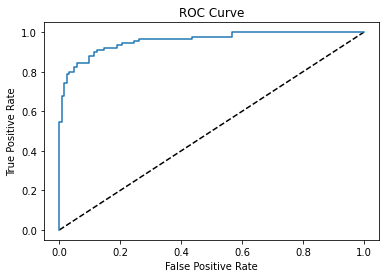

In [71]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
for i in cv_scores:
    print(f"{round(i * 100,3)}% Accuracy")

AUC: 0.9577413479052823
94.318% Accuracy
97.045% Accuracy
96.403% Accuracy
96.594% Accuracy
97.824% Accuracy


In [34]:
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

In [75]:
""" from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-4, 4, 20)
param_grid = {'C': c_space}

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))
#having a c-value of 545 increases the accuracy of the model a little bit """
# Not needed since LogReg has no params

Tuned Logistic Regression Parameters: {'C': 10000.0}
Best score is 0.9282120395327942


In [47]:
#unnormalize X
X = cancernona.drop('diagnosis', axis = 1).values
print(X)

[[1.79900e+01 1.00100e+03 2.77600e-01 ... 2.65400e-01 1.00000e+00
  2.22898e+03]
 [2.05700e+01 1.32600e+03 7.86400e-02 ... 1.86000e-01 1.00000e+00
  2.13979e+03]
 [1.96900e+01 1.20300e+03 1.59900e-01 ... 2.43000e-01 1.00000e+00
  1.88507e+03]
 ...
 [2.01300e+01 1.26100e+03 1.03400e-01 ... 1.62800e-01 1.00000e+00
  1.90969e+03]
 [1.66000e+01 8.58100e+02 1.02300e-01 ... 1.41800e-01 1.00000e+00
  1.26968e+03]
 [2.06000e+01 1.26500e+03 2.77000e-01 ... 2.65000e-01 1.00000e+00
  2.03134e+03]]


In [77]:
#Trees
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

from sklearn.metrics import accuracy_score



# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

#overfitting

[1 0 1 0 0]
Test set accuracy: 0.92


In [82]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
r2 = logreg.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.29138575870717925